<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/LSTM_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network   
# Part 1 - Data Preprocessing

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set

In [33]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling

In [34]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output

In [35]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping

In [36]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages

In [38]:
import tensorflow as tf

#Initialize the RNN

In [39]:
regressor = tf.keras.models.Sequential()

#Add FIRST LSTM layer and Dropout regularization 

In [40]:
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(tf.keras.layers.Dropout(0.2))

Add SECOND LSTM layer and Dropout regularization

In [41]:
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))

Add THIRD LSTM layer and Dropout regularization

In [42]:
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))

#Add FOURTH LSTM layer and Dropout regularization

In [43]:
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
regressor.add(tf.keras.layers.Dropout(0.2))

#Add the OUTPUT layer

In [44]:
regressor.add(tf.keras.layers.Dense(units=1))

#COMPILE

In [45]:
regressor.compile(optimizer='adam', loss="mean_squared_error")

#Fit the model to training dataset

In [46]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100, verbose =2)

Epoch 1/100
38/38 - 6s - loss: 0.0342 - 6s/epoch - 148ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0062 - 413ms/epoch - 11ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0047 - 417ms/epoch - 11ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0050 - 425ms/epoch - 11ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0049 - 434ms/epoch - 11ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0043 - 412ms/epoch - 11ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0053 - 416ms/epoch - 11ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0052 - 418ms/epoch - 11ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0044 - 409ms/epoch - 11ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0045 - 421ms/epoch - 11ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0047 - 424ms/epoch - 11ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0046 - 413ms/epoch - 11ms/step
Epoch 13/100
38/38 - 0s - loss: 0.0039 - 422ms/epoch - 11ms/step
Epoch 14/100
38/38 - 0s - loss: 0.0038 - 441ms/epoch - 12ms/step
Epoch 15/100
38/38 - 0s - loss: 0.0034 - 428ms/epoch - 11ms/step
Epoch 16/100
38/38 - 0s - loss: 0.00

#Making the predictions and Visualizing the results

#Getting real stock prices of 2017

In [47]:
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [48]:
real_stock_price = dataset_test.iloc[:,1:2].values

#Gettig the predicted stock prices 2017

In [49]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis =0)

In [50]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [51]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [52]:
inputs=inputs.reshape(-1,1)

In [53]:
inputs= sc.transform(inputs)

In [ ]:
inputs

In [55]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

In [56]:
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [57]:
predicted_stock_price =regressor.predict(X_test)

In [59]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [60]:
predicted_stock_price

array([[780.06177],
       [777.1038 ],
       [777.09973],
       [778.5855 ],
       [782.04974],
       [788.03564],
       [793.64685],
       [796.01355],
       [796.2182 ],
       [795.74304],
       [795.35425],
       [795.0807 ],
       [794.9413 ],
       [795.4866 ],
       [796.47284],
       [800.9461 ],
       [807.8959 ],
       [815.4047 ],
       [819.55963],
       [815.5218 ]], dtype=float32)

#Visualize the results

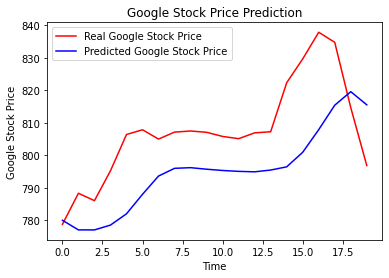

In [61]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()